# Adat:

## leírás

Az adat az én saját teljes facebook messenger history-m, 2010-től múlt szombatig. Azért nem láttok belőle mindent, a következők a korlátok:

- az üzeneteket nem látjátok, csak a hosszukat, karakterben
- mindenkinek a nevét véletlenszerűen kicseréltem egy híres emberével (a forbes celebrity top100-ból, oszkárdíjas/oszkár jelölt színészek és a top 100 kitalált karakter közül válogatva)
- a névcsere konziztens, így egy híresség mindig ugyanazt az embert jelöli (akkor is, ha a csetben esetleg valaki megváltoztatta a nevét)
- fotók, videók, stickerek és gifek sincsenek meg, csak az, hogy adott üzenetben a küldő hány ilyet küldött

## forma

Az adat *json* formátumban van, amit a pythonba úgy fogunk beolvasni, hogy egy listát kapunk, amiben dictionary-k vannak. Minden dictionary egy csetben történt eseményt jelöl, ezek a következőek lehetnek:
- elküldött üzenetet
- valaki megosztott valamilyen tartalmat
- valakit felvettek a beszélgetésbe vagy kirakták/kirakta magát

Minden dictionaryben 19 key van, amik a következőket jelentik:

- ```type```: ez négy féle dolog lehet
    - *Generic*: ez azt jelenti, hogy a dictionary egy sima üzenetet jelöl
    - *Share*: ez valamilyen tartalom megosztását jelenti
    - *Subscribe*: ez azt jelenti, hogy valaki hozzáadott valakit a beszélgetéshez
    - *Unsubscribe*: ez azt jelenti, hogy valaki levett valakit a beszélgetésről
- ```sender_name```: *string*, a küldő, megosztó, vagy beszélgetésbe felvevő/leszedő álneve
- ```datetime```/```year```/```month```/```day```/```hour```/```minute```: ezek az esemény idejét jelzik
- ```timestamp_ms```: az 1970 január 1. óta eltelt miliszekundumok számát jelzi (arra pl. elég jó, hogy nagyon könnyen ki lehet vele számolni két esemény között eltelt időt, meg összehasonlításra is szuper)
- ```content_l```: *float*, ez mindig az üzenetben elküldött karakterek számát jelöli
- ```gifs```/```videos```/```photos```/```sticker```: ezek a nevükben megfogalmazott tartalomtípus darabszámát jelölik az üzenetben
- ```reactions```: ez egy lista azokról az emberekről, akik reactokat nyomkodtak az üzenetre
- ```users```: ez egy lista azokról az emberekről, akik a beszélgetéshez hozzá lettek adva, vagy el lettek távolítva (csak akkor aktuális, ha a ```type``` *Subscribe* vagy *Unsubscribe* értéket vesz fel)
- ```thread_path```: ez annak a threadnek (beszélgetésnek) az azonosítója, amiben az adott esemény történt
- ```thread_type```: ez a thread fajtáját jelöli, lehet *RegularGroup* (csoportos) vagy *Regular* (egyéni)
- ```index```: ez az adott esemény indexe, évenként egyedi

**Az adat nincs időrendi sorrendben!** Ha olyan feladatot szeretnétek megoldani, amihez ez hasznos, nektek kell sorbarakni.

# Segítség:

## Az adat évenként van külön fájlokba szedve, így tudom pl 2011-et beolvasni:

In [2]:
import json

In [2]:
path_to_file = 'data/2011-msg.json'

In [3]:
list_of_dicts_2011 = json.load(open(path_to_file,'r'))

In [4]:
type(list_of_dicts_2011)

list

In [40]:
list_of_dicts_2011[10]

{'index': 2736,
 'sender_name': 'Kim Hunter',
 'timestamp_ms': 1317483598004,
 'type': 'Generic',
 'thread_path': 230,
 'thread_type': 'RegularGroup',
 'reactions': [],
 'sticker': None,
 'ip': None,
 'photos': 0,
 'users': [],
 'gifs': 0,
 'videos': 0,
 'content_l': 2,
 'datetime': '2011-10-01T17:39:58.004Z',
 'year': 2011,
 'month': 10,
 'day': 1,
 'hour': 17,
 'minute': 39}

In [6]:
len(list_of_dicts_2011)

9598

## A python string formázós technikájával + egy egyszerű függvénnyel paraméteresen is be lehet olvasni az adatot az egyes évekre:

In [3]:
def get_data_by_year(year):

    path_to_file = "data/{}-msg.json".format(year)
    return json.load(open(path_to_file, "r"))

In [4]:
list_of_dicts_2010 = get_data_by_year(2010)

In [7]:
list_of_dicts_2010[34]

{'index': 0,
 'sender_name': 'Jesse Eisenberg',
 'timestamp_ms': 1290623412000,
 'type': 'Generic',
 'thread_path': 302,
 'thread_type': 'RegularGroup',
 'reactions': [],
 'sticker': None,
 'ip': None,
 'photos': 0,
 'users': [],
 'gifs': 0,
 'videos': 0,
 'content_l': 833,
 'datetime': '2010-11-24T19:30:12.000Z',
 'year': 2010,
 'month': 11,
 'day': 24,
 'hour': 19,
 'minute': 30}

## Ha esetleg szeretnétek valamit ábrázolni, javaslom hozzá a matplotlib package-et

### itt egy példa arról, hogy hogyan készül egy histogramm az események hónapokra vonatkozó eloszlásáról (2012-ből)

'tadaa!'

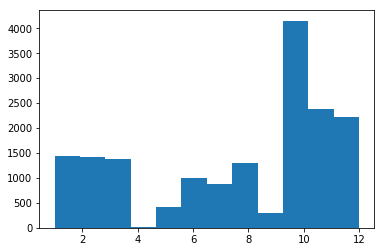

In [9]:
# készítek egy listát amibe minden eseménynél berakom a hónapot

event_months = []
for dic in list_of_dicts_2012:
    event_months.append(dic["month"])

# importálom matplotlibet és beállítom hogy faszán működjön jupyter notebookban
# ezt érdemes csak egyszer a notebook elején

import matplotlib.pyplot as plt

%matplotlib inline

# ezzel a borzasztó egyszerű parancsal elkészítem a histogrammot

plt.hist(event_months, bins=12)

"tadaa!"

# Explore feladatok

- mi az én álnevem? (1 pont)
- mi a jeszk-moments azonosítója? (2 pont)
- melyik a 2019-es db-cset? (5 pont)
- hányan vannak, akik minden évben küldtek üzenetet? (3 pont)
- hányan vannak, akik pontosan n évben küldtek üzenetet ($ n = 1, ... 11 $) (2 pont, ábrázolásért +1)
- ki írja átlagosan a leghosszabb üzeneteket? (2 pont)
- ki van bent a második legtöbb csetben? (3 pont)
- melyik az a cset, ahol a legtöbb idő telt el két üzenet között, és mennyi ez az idő? (4 pont)

# Függvény Feladatok

- megadok egy timestamp-et, ki az eddig az időpontig írt leghosszabb üzenet szerzője? (1 pont)
- megadok egy timestamp-et, melyik óra eddig az időpontig a legkevésbé aktív (1 pont)
- megadok egy timestamp-et és egy embert, mondd meg, hány karaktert küldött eddig az időpontig (2 pont)
- megadok egy timestamp-et, hányan írtak eddig az időpontig legalább 10 üzenetet? (3 pont)
- megadok egy timestamp-et, melyik volt a top5 legaktívabb cset  eddig az időpontig (4 pont)
- megadok egy timestamp-et és egy csetet (```thread_id```), összesen hány különböző ember, hány üzenetben, hány karaktert írt eddig az időpontig (4 pont)
- megadok egy timestamp-et, melyik csetbe és kicsoda írta  eddig az időpontig a legtöbb karaktert (5 pont)
- megadok egy órát, átlagosan hány üzenetet küldtek ebben az órában (az összes eltelt napra átlagolva) (5 pont)
- megadok egy timestamp-et, mi volt a leghosszabb periódus eddig az időpontig üzenet nélkül (7 pont)

### bónusz:

- bárhol ahol top1-et keresünk, megadni top5öt (+1 pont)
- bármelyik csapat dobhat be plusz feladatokat a megbeszélt időkorlátig publikusan, rögtön válaszolok rá, hogy hány pontot érne
- ha olyan feladatot csinálsz meg, amit egyik másik csapat sem tudott (+1 pont)